In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv("D:\Acmegrade\Files\Position Salary .csv")
file

,Position,Level,Salary
0,Busienss Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,120000
4,Country Manager,5,140000
5,Region Manager,6,130000
6,Partnor,7,100000
7,Senior Partnor,8,90000
8,C Level,9,95000
9,CEO,10,85000


In [15]:
x=file.iloc[:,1:-1].values
y=file.iloc[:,-1].values

In [16]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [17]:
y

array([ 45000,  50000,  60000, 120000, 140000, 130000, 100000,  90000,
        95000,  85000], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(x,y,test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [21]:
dt.fit(x_train,y_train)
a=dt.predict(x_test)
a

array([50000., 95000.])

In [22]:
final=dt.predict(x)
final

array([ 45000.,  50000.,  50000., 120000., 140000., 130000., 100000.,
        90000.,  95000.,  95000.])

In [23]:
from sklearn.metrics import r2_score
acc=r2_score(y,final)
acc

0.9792799792799792

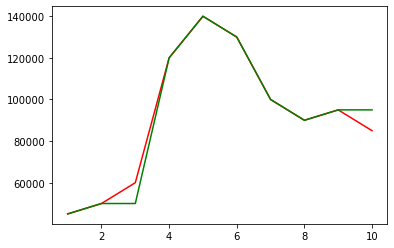

In [24]:
plt.plot(x,y, color="r")
plt.plot(x,final, color= "g")
plt.show()

In [27]:
df_pred=pd.DataFrame(final,columns=["Prediced Output"])
result=pd.concat([file,df_pred],axis=1)
result

,Position,Level,Salary,Prediced Output
0,Busienss Analyst,1,45000,45000.0
1,Junior Consultant,2,50000,50000.0
2,Senior Consultant,3,60000,50000.0
3,Manager,4,120000,120000.0
4,Country Manager,5,140000,140000.0
5,Region Manager,6,130000,130000.0
6,Partnor,7,100000,100000.0
7,Senior Partnor,8,90000,90000.0
8,C Level,9,95000,95000.0
9,CEO,10,85000,95000.0


In [28]:
result.to_excel("D:\Acmegrade\Outputs\Decision_Tree.xlsx")